In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

![title](../images/simple_workflow.png)

# Collecte des données

## Lecture

https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

In [31]:
df = pd.read_csv("Life Expectancy Data.csv")
df_2015 = df[df.Year == 2014]
df_2015 = df_2015.drop("Year",axis=1)
df_2015.set_index("Country",inplace = True)

In [32]:
data = df_2015[['Life expectancy ','Schooling']]
data = data.dropna(axis=0)

In [33]:
data.head()

,Life expectancy,Schooling
Country,,
Afghanistan,59.9,10.0
Albania,77.5,14.2
Algeria,75.4,14.4
Angola,51.7,11.4
Antigua and Barbuda,76.2,13.9


## Définition

**Schooling**: Expected years of schooling is the number of years a child of school entrance age is expected to spend at school, or university, including years spent on repetition. It is the sum of the age-specific enrolment ratios for primary, secondary, post-secondary non-tertiary and tertiary education.

**Life expectancy**: The average number of years that a newborn could expect to live, if he or she were to pass through life exposed to the sex- and age-specific death rates prevailing at the time of his or her birth, for a specific year, in a given country, territory, or geographic area.

# Définition du modèle

On va faire un modèle de régression linéaire: $Y = a \times X + b$

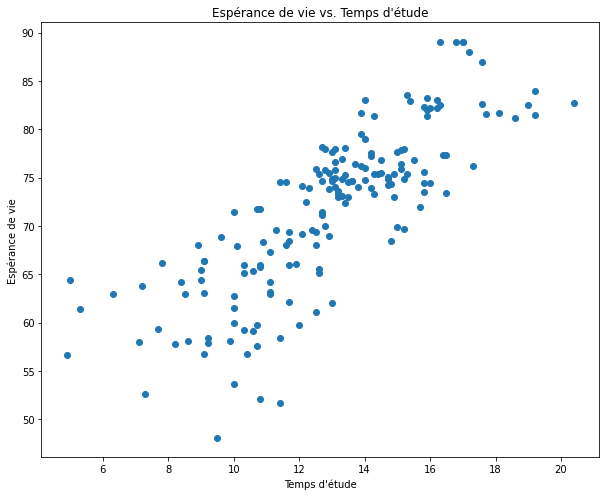

In [68]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(y = data['Life expectancy '],x = data['Schooling'])
plt.xlabel("Temps d'étude")
plt.ylabel("Espérance de vie")
plt.title("Espérance de vie vs. Temps d'étude")
plt.show()

In [58]:
modele_simple = LinearRegression()

# Calibrage du modèle

On va chercher les meilleurs paramètres $a$ et $b$

In [59]:
modele_simple.fit(data[['Schooling']],data['Life expectancy '])

LinearRegression()

In [60]:
modele_simple.intercept_

41.51230517169597

In [61]:
modele_simple.coef_

array([2.33714788])

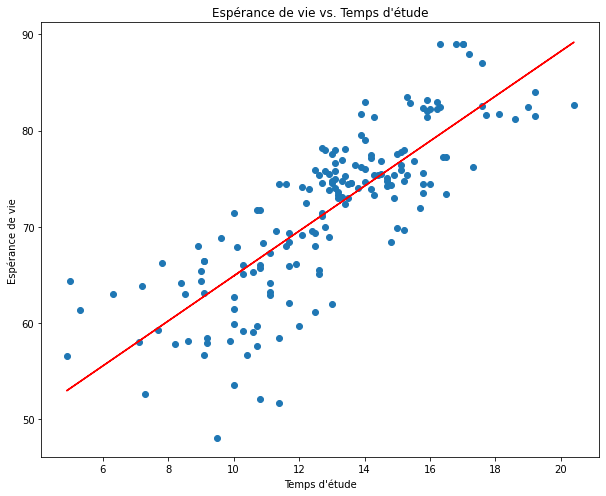

In [72]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(y = data['Life expectancy '],x = data['Schooling'])

Y_model = modele_simple.predict(data[['Schooling']])
ax.plot(data['Schooling'],Y_model,"red")

plt.xlabel("Temps d'étude")
plt.ylabel("Espérance de vie")
plt.title("Espérance de vie vs. Temps d'étude")
plt.show()

In [63]:
ax

<AxesSubplot:title={'center':"Espérance de vie vs. Temps d'étude"}, xlabel="Temps d'étude", ylabel='Espérance de vie'>

# Nouvelle donnée

https://www.nationmaster.com/country-info/profiles/Benin/Education

In [45]:
nouvelle_donnee = pd.DataFrame({"Schooling":[5]}
)

In [46]:
modele_simple.predict(nouvelle_donnee)

array([53.19804459])